# Generalisation, underfitting and overfitting

**NOTES**
- Usually collecting more data points yields more variety, and therefore allows for more complex models
- For the KNeighbours algorithm, using n=1 results in a more complex model, while using a higher value for n will create a more smooth line, and therefore a less complex model
- The **stratify parameter ensures that the splitting process preserves the proportion of classes in the target variable** (in this case, cancer.target) in both the training and testing datasets.
- While the nearest K-neighbour algorithm is easy to understand, it is not often used in practice due to the prediction being slowe and its inabilitity to handle many features. It also doesn't work well in DS where features are 0 most of the time (sparse datasets)
- For K-neighbours, you can also use other ways to measure the distance (by default, Euclidian distance is used)
- L1 Lasso, L2 ridge
- For linear models, Ridge is mostly used compared to Lasso. However if you have a high number of features and expect some of them to have no effect, you could use Lasso

- When the score for the trainig and test sets are very similar, you could be underfitting

- The main parameter of LINEAR MODELS is the regularisation parameter (alpha in regression models; C in LinearSVC and Logistic Regression.) Large values of alpha, or small values of C, mean simpler models).  *The more regularised, the simpler the model*

- Sometimes you need to adapt the "solver" when creating your model. *solver='sag'* can be faster in larger datasets.

- Tree models cannot make predicitons with new values that are outside their range. For example, with you train a model with house prices from 1990 - 2020, if you want to predict the price of a house in 2024, the model will simply use the values it has up to its range, in this case, 2020. Simple decision trees are easier to visualise, but they tend to overfit. They do not require normalisation or standartisation of features.

- Ensembles are methds that combine multiple machine learning models.



## Sample dataset


X.shape is (26, 2)


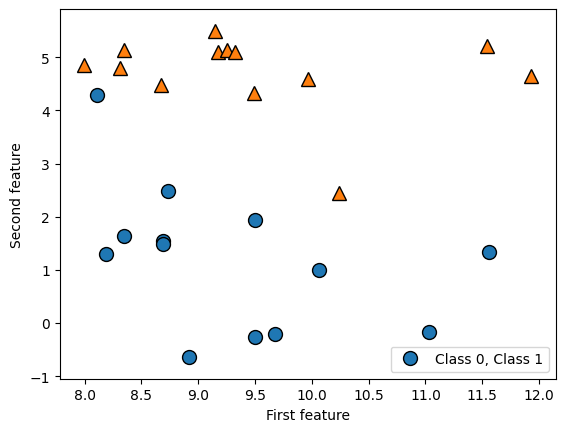

In [3]:
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer #dataset used in the examples

# Generate dataset
X, y = mglearn.datasets.make_forge()


# Plot dataset
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["Class 0, Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print(f"X.shape is {X.shape}")



In [4]:
# inspecting the 'breast cancer DS' we will use

#loads DS
cancer = load_breast_cancer()
print(f"DATASET CANCER keys {cancer.keys()}")


# gets DS data shape
print(f"The shape of cancer data: {cancer.data.shape}")

# Checks how many malignant and benign points
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))


# Checks features names
print(f"Features names\n {cancer.feature_names}")

DATASET CANCER keys dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
The shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Features names
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## 2.1 Analysing KNeighbours Classifier

In [5]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
print(f"The accuracy score is {knn.score(X_test, y_test):.2f}")

The accuracy score is 0.86


For two-dimension datasets, we can plot graphs to help visualise the 'decision boundary', which is the divide the algorithm uses

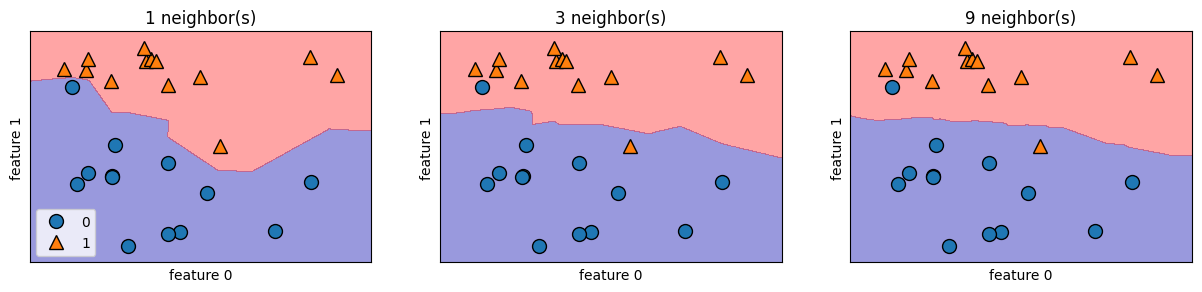

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

for n_neighbors, ax in zip([1,3, 9], axes):
    # the fit method returns the object self, so we can instantiate and fit in one line
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

Now we will check the performace with different number of neighbours.

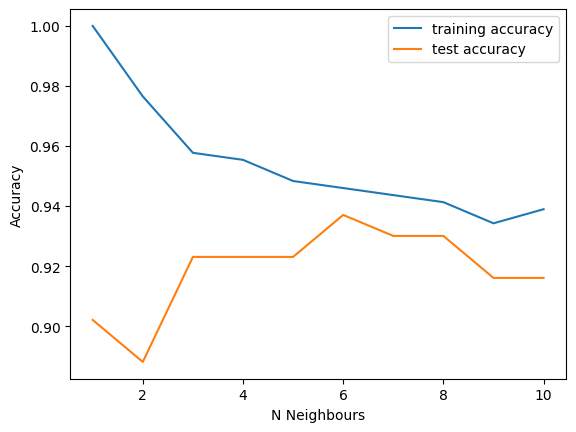

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# try n_neighbours from 1 to 10
neighours_range = range(1,11)

for n in neighours_range:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    # record training accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighours_range, training_accuracy, label="training accuracy")
plt.plot(neighours_range, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("N Neighbours")
plt.legend()

## 2.2 Linear Models

- Linear regression, is also known as ordinary least squares (OLS). This model has no parameters.
- Linear regression finds the parameters w and b that minimise the mean squared error between y and y-hat.
- SCORE (default mode to evalue the model) = R-squared, values between 0-1, while 1 indicates a better model
- Given a model lg, w (the slope,  where is crosses x-axis), is stored at the model lg.coef_; The intercept b( where crosses y axis), is stored at lg.intercept_
- If the model has a much better score for the training set than than the test set, we have a sign of overfitting

In [8]:
from sklearn.linear_model import  LinearRegression
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test, = train_test_split(X, y, random_state=42)

lg = LinearRegression().fit(X_train, y_train)

print(f"Coeficients: {lg.coef_}")
print(f"Intercept {lg.intercept_}")

print(f"LINEAR REG training score {lg.score(X_train, y_train):.2f}")
print(f"LINEAR REG test score {lg.score(X_test, y_test):.2f}")


Coeficients: [-5.11126504e+02  4.02559787e+00 -9.45778613e+01  1.34720251e+01
  3.48176257e+01  6.03611391e+01  3.49707471e+01  2.94114542e+00
  3.14525465e+00  8.20792132e+01  1.24254396e+01  3.86676075e+01
 -9.38409521e-01  1.32936334e+01  7.60317098e+02  1.42274855e+03
  2.29220565e+02 -7.79405429e+01  8.79429261e+01  1.39813973e+01
  1.02565346e+02  7.52178879e+02 -1.82071934e+03  5.34143172e+02
 -2.41122305e+01  1.11848898e+02 -4.38177813e+00 -1.23079894e+01
 -3.63360790e+00 -5.64878037e+01  4.60395879e-01  8.18005986e+00
 -2.06294404e+01 -3.49659791e+01  4.31717988e+01 -2.92220843e+00
  1.45250942e+01 -3.24346333e+01  3.66984591e+01 -2.75859278e+00
  6.27805740e+00  4.98379104e+01  6.55060318e+00  3.91047481e+01
 -1.14826290e+01 -8.00990322e-01 -3.68662287e+00  3.36483260e+01
 -1.49103502e+01  1.34720251e+01 -1.80244019e+01 -2.90956806e+01
 -2.78115796e+00 -1.10315060e+01  1.15584830e+00 -8.37313259e-01
 -7.89905136e+00  6.27950290e+00 -1.09538327e+01 -2.48389637e+01
 -1.16316264

### 2.2.1 Ridge regression
- Ridge is a linear regression model, with regularisation (L2 regularisation).
- It regularises the values of the coeficiens, so they have the values as close to zero as possible.
- Ridge is less likely to overfit compared to traditional linear model
- In ridge you can manipulate the parameter alpha. The higher the value of alpha, the more coefficients are restricted - they will go towards zero. the default value for alpha is 0.1. If you have alpha=0, you basically have a simple linear regression
- When you decrease training set performance, but increase test set performance, you have a better generalisation
- With enough training data regularisation becomes less important

In [9]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.05).fit(X_train, y_train)

print(f"RIDGE training score {ridge.score(X_train, y_train):.2f}")
print(f"RIDGE test score {ridge.score(X_test, y_test):.2f}")

# Ps: this is a simple dataset, with a more complex like the Boston dataset we set more differences in the values

RIDGE training score 0.92
RIDGE test score 0.82


### 2.2.2 Lasso regression

- Also known as L1 regularisation
- In Lasso, some coefficients will actually be zero. This means some features will be ignored by the model
- Using less features makes the model potentially easier to intepret

In the example below, the first model does quite badly for both training and test sets, which indicates it is underfitting.
**To reduce underfitting, we can decrease alpha; when we do this we need to increase the default setting of max_iter**

In [10]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print(f"LASSO training score {lasso.score(X_train, y_train):.2f}")
print(f"LASSO test score {lasso.score(X_test, y_test):.2f}")

# since some features will be given the value of zero, and therefore ignored,
# this lines shows the number of features actually used in the model
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

LASSO training score 0.27
LASSO test score 0.26
Number of features used: 3


In [11]:
# we increase the default setting of max_iter
# otherwise the model would wanr us that we should increase max_iter

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print(f"LASSO alpha=0.01 train score {lasso001.score(X_train, y_train):.2f}")
print(f"LASSO alpha=0.01 test score {lasso001.score(X_test, y_test):.2f}")

print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")


print("|---------------------|")

lasso0001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)

print(f"LASSO alpha=0.001 train score {lasso0001.score(X_train, y_train):.2f}")
print(f"LASSO alpha=0.001 test score {lasso0001.score(X_test, y_test):.2f}")

print(f"Number of features used: {np.sum(lasso0001.coef_ != 0)}")

LASSO alpha=0.01 train score 0.89
LASSO alpha=0.01 test score 0.80
Number of features used: 34
|---------------------|
LASSO alpha=0.001 train score 0.93
LASSO alpha=0.001 test score 0.82
Number of features used: 73


## 2.3 Logistic Regression for Classification

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)

print(f"Training set score {logreg.score(X_train, y_train):.3f}")
print(f"Test set score {logreg.score(X_test, y_test):.3f}")



Training set score 0.958
Test set score 0.958


By default, Logistic Regression (and LinearSVC) apply L2 regularisation, called C. Higher values of C correspond to less regularisation. 

In other words, when you use a high value of C, the model try to fit the training set as best as possible, while low values of C, the model puts more emphasis on finding a coefficient vector w that is closer to zero. 
Also, using low values of C will make the model to "adjust to the majority" of data points, while a higher value of C stresses the importance that each individual point is classified correctly. 

By default, C=1.

In [13]:
# running the model with other values for C

# Here, as the model has now C=100 instead of the default C=1, the model is less regularised

logreg100 = LogisticRegression(C=100, max_iter=100000).fit(X_train, y_train) # also applying max_iter to remove the warning

print(f"Traing score C100 {logreg100.score(X_train, y_train):.3f}")
print(f"Test score C100 {logreg100.score(X_test, y_test):.3f}")


# testing a third model with a low value for C, thus more regularised
logreg001 = LogisticRegression(C=0.01, max_iter=100000).fit(X_train, y_train)

print(f"Train score C0.01 {logreg001.score(X_train, y_train):.3f}")
print(f"Test score C0.01 {logreg001.score(X_test, y_test):.3f}")

Traing score C100 0.984
Test score C100 0.965
Train score C0.01 0.953
Test score C0.01 0.951


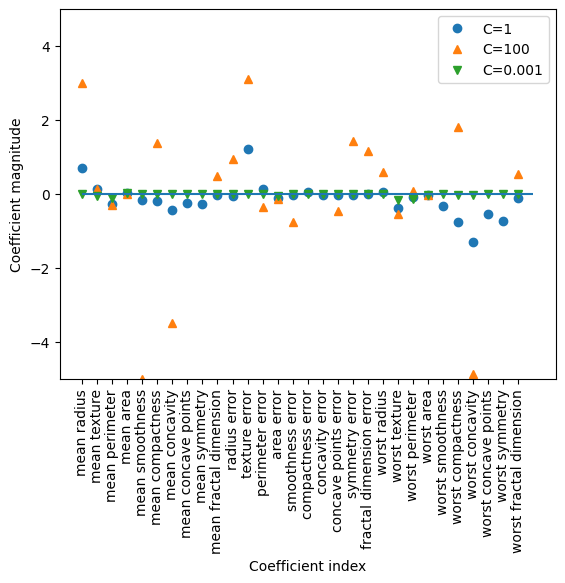

In [14]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

If we want a model that is easier to interpret, we can use L1 regularisation:

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


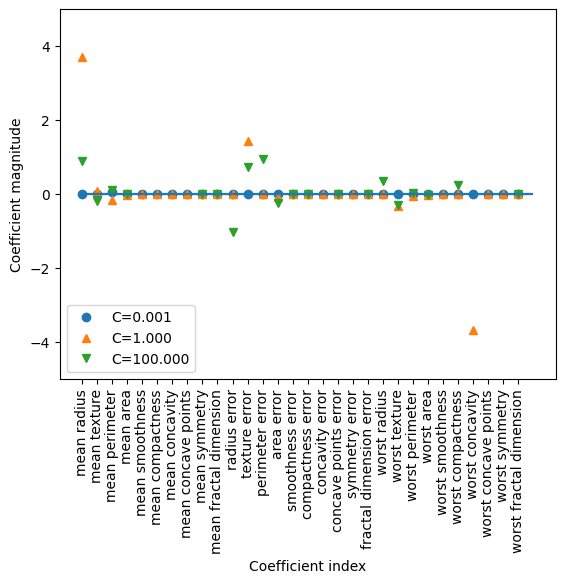

In [15]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):

    #NOTE: I need to specify the solver here otherwise, the penalty doesn't work
    # liblinear solver is suitable for small to medium-sized datasets, while saga can be more efficient for larger datasets.
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=100000).fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))


    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
    plt.hlines(0, 0, cancer.data.shape[1])
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.ylim(-5, 5)
    plt.legend(loc=3)

### 2.4 Decision Trees


In [16]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)

print(f"Accuracy on the training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on the test set: {tree.score(X_test, y_test):.3f}")

Accuracy on the training set: 1.000
Accuracy on the test set: 0.937


The accuracy on the training set above is 100% as expected since the leaves are pure. However the performace of the test set is lower than when we use the linear model for classification. We can further and determine a max depth for the tree.

In [17]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)

tree.fit(X_train, y_train)

print(f"Accuracy on the training set with max depth=4: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on the test set with max depth=4: {tree.score(X_test, y_test):.3f}")

Accuracy on the training set with max depth=4: 0.988
Accuracy on the test set with max depth=4: 0.951


To analyse decision trees, we can plot a graph. This will returna  .dot file. You can use any programme that reads that format, or open with Python.

Feature importances:[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


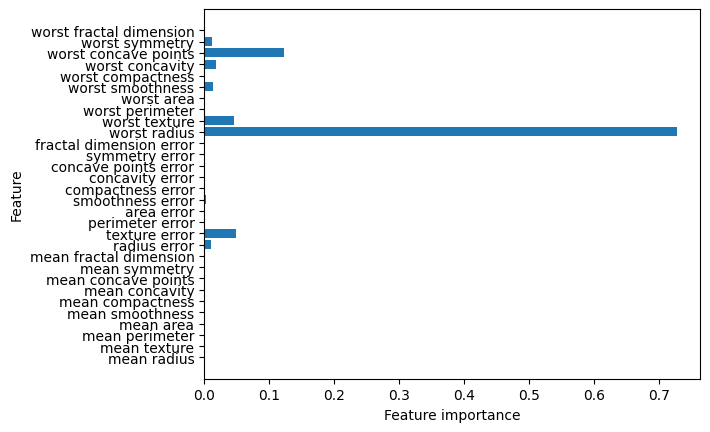

In [21]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["maliginant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph= f.read()
    graphviz.Source(dot_graph)


# we can also check which features were important in the prediciton, these values go from 0 to 1
print(f"Feature importances:{tree.feature_importances_}")

# to be able to visualise this in a graph

def plot_tree_feature_importance(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_tree_feature_importance(tree)

### 2.5 Random Forests

Random forests are a combination of decision trees that are all different.
To make sure the trees in the forest are different, there are two steps:

- we use a bootstrap sampling. The original dataset is used as a basis. We create additional sets with the same size of the original, however, in these sets there could be duplicates of some points, and some points could be missing. For example,
if the original set is: [1, 2, 3, 4], two additional sets could be [1, 1, 3, 4] and [3, 4, 4, 3].

- we limit the number of features the model can use. This is done by the parameter: max_features

To build a random forest, we need to decide the number of trees to build. We use the parameter (n_estimators for this).

**GENERAL GUIDANCE FOR BUILDING FORESTS**

 - Smaller max_features reduces overfitting.
 - In general, it’s a good rule of thumb to use the default values: max_features=sqrt(n_features) for classification and max_features=log2(n_features) for regression.
- Adding max_features or max_leaf_nodes might sometimes improve performance.

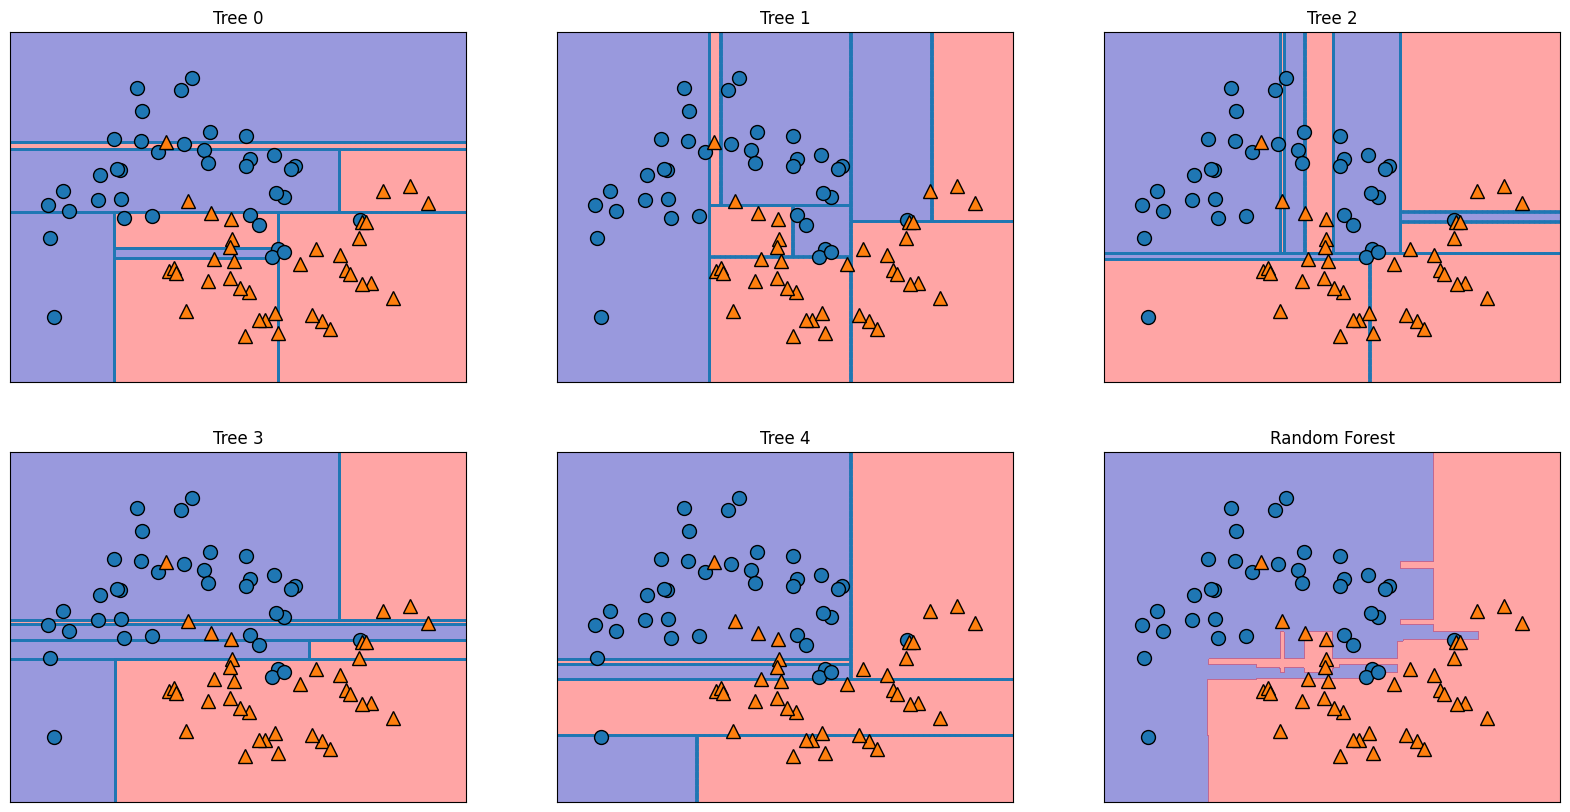

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3) #create random moons we will use to run this examples

X_train, x_test, y_train, y_test = train_test_split (X, y, stratify=y, random_state=42)


forest=RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


#The trees created are stores in the estimator_ parameter
# Let's visualise the decision boundaries of the trees

fix, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Tree {i}")
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)


Random Forest=100, training score 1.0
Random Forest=100, test score 0.972


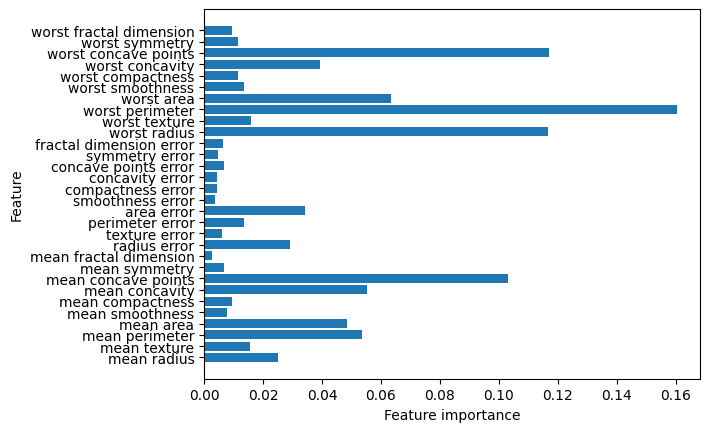

In [25]:
# using the cancer dataset to create a forest with 100 trees

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print(f"Random Forest=100, training score {forest.score(X_train, y_train)}")
print(f"Random Forest=100, test score {forest.score(X_test, y_test):.3f}")

# to see feature importante, we can use the function we defined before
plot_tree_feature_importance(forest)


### 2.5 Gradient Boost Trees

This is widely used in industry. The idea is that new trees are created after each other, as new trees correct mistakes from previous trees.The trees here are usually shallowers (not max than five splits).

- A higher learning rate makes each tree make stronger corrections
- For this algorithm, *accuracy of 100% in the training set is likely to be overfitting*. You fix this by pre-prunning (Max-depth) or lowering the learning rate (learning_rate).
- Usually in "real world" random forests are used first, and them moving on to Gradient Boost Trees if accuracy is really important or if prediction time is a must. It might be better use the package "xgboost" when working with this algorithm. 


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gradient = GradientBoostingClassifier(random_state=0)
gradient.fit(X_train, y_train)

print(f"Gradient accuracy on training set {gradient.score(X_train, y_train):.3f}")
print(f"Gradient accuracy on test set {gradient.score(X_test, y_test):.3f}")

gradient_prunning = GradientBoostingClassifier(random_state=0, max_depth=1)
gradient.fit(X_train, y_train)

print(f"Gradient accuracy on training set, with pre-prunning {gradient_prunning.score(X_train, y_train):.3f}")
print(f"Gradient accuracy on test set, with pre-prunning  {gradient_prunning.score(X_test, y_test):.3f}")

gradient_learningrate = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gradient_learningrate.fit(X_train, y_train)

print(f"Gradient accuracy on training set, with adjusted learning rate {gradient_learningrate.score(X_train, y_train):.3f}")
print(f"Gradient accuracy on test set, with adjusted learning rate   {gradient_learningrate.score(X_test, y_test):.3f}")


Gradient accuracy on training set 1.000
Gradient accuracy on test set 0.965


### 2.6 Kernelised Support Vector Machines (SVMs)

For the algorithm to work well, the features need to be on the same order of magnitude. Therefore it is necessary to scale the features. They allow complex decision boundaries, but they don't scale well, so with 100,000 data points, it might be tricky to run in terms of computational power.

- *gamma*: A small gamma means large radius for the Gaussian kernel, a more smooth decision boundaries. A large gammma focus more on singles points, thus a more complex model. It can create several "areas" where points are grouped together.
Default: gamma= 1/n_features

- *C parameter*: With a small C, points have less importance in the classification. With higher values of C, the boundaries will "bend" to include the point correctly.
Default = C= 1


Text(0, 0.5, 'Feature 1')

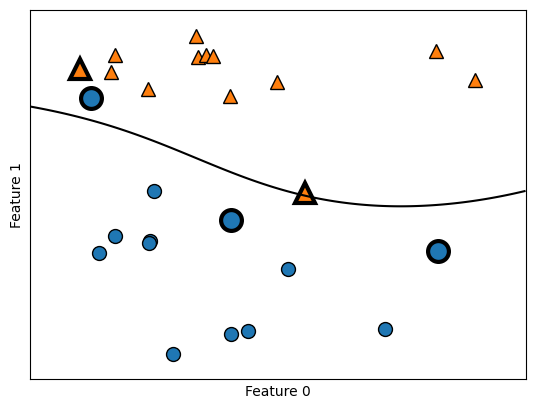

In [2]:
from sklearn.svm import SVC
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [3]:
# Applying SVM on the breast cancer dataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer #dataset used in the examples

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

svc = SVC()
svc.fit(X_train, y_train)

print(f"Accuracy of the SVC on the training set: {svc.score(X_train, y_train):.3f}")
print(f"Accuracy of the SVC on the test set: {svc.score(X_test, y_test):.3f}")

Accuracy of the SVC on the training set: 0.904
Accuracy of the SVC on the test set: 0.937
